## Observations and Insights 

In [1]:
# %matplotlib inline  
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = mouse_data_complete.count()
mouse_count

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mdc_copy = mouse_data_complete.copy()
dups_df = mdc_copy[mdc_copy.duplicated(["Mouse ID", "Timepoint"])]
dups_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_clean = mdc_copy.drop_duplicates(subset=["Mouse ID", "Timepoint"])
mouse_data_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_data_clean.count()

Mouse ID              1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_gp = mouse_data_clean.groupby("Drug Regimen")
# regimen_gp.describe()["Tumor Volume (mm3)"]


# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean_regimen = regimen_gp.mean()["Tumor Volume (mm3)"]
median_regimen = regimen_gp.median()["Tumor Volume (mm3)"]
median_regimen = regimen_gp.median()["Tumor Volume (mm3)"]
var_regimen = regimen_gp.var(ddof = 0)["Tumor Volume (mm3)"]
sd_regimen = regimen_gp.std(ddof = 0)["Tumor Volume (mm3)"]
sem_regimen = regimen_gp.sem()["Tumor Volume (mm3)"]

tumor_volume_summary_df = pd.DataFrame({
    "Mean": mean_regimen,
    "Median": median_regimen,
    "Variance": var_regimen,
    "Standard Dev": sd_regimen,
    "SEM": sem_regimen
    
})
tumor_volume_summary_df


,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.393463,50.909965,42.862273,6.546928,0.525862
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_df = []
summary_df = mouse_data_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([np.mean,np.median,np.var,np.std,st.sem])
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

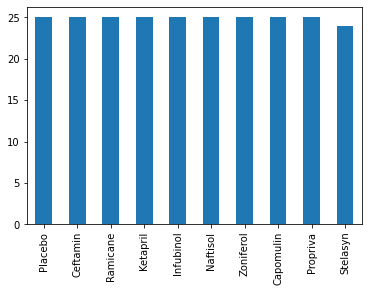

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_count_pd = mouse_data_clean[["Mouse ID","Drug Regimen"]].drop_duplicates()
mice_count_df = pd.DataFrame(mice_count_pd["Drug Regimen"].value_counts())
mice_count_df.plot.bar(legend=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

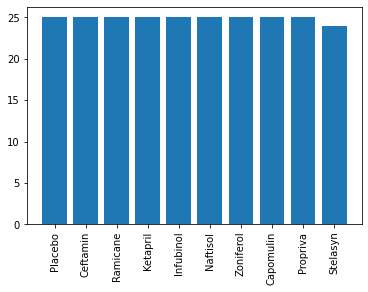

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x = mice_count_df.index
y = mice_count_df["Drug Regimen"]
plt.bar(x,y)
plt.xticks(rotation=90)

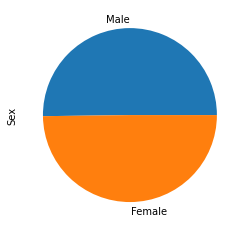

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count_pd = mouse_data_clean[["Mouse ID","Sex"]].drop_duplicates()
gender_count_df = pd.DataFrame(gender_count_pd["Sex"].value_counts())
gender_count_df.plot.pie(y="Sex", legend=False)


([<matplotlib.patches.Wedge at 0x20883c54208>,
 [Text(-0.0069391759767656585, 1.0999781124353174, 'Male'),
  Text(0.006939175976765524, -1.0999781124353174, 'Female')])

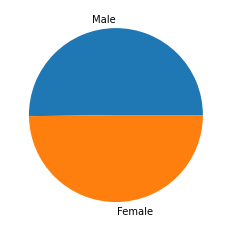

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_count_df.index
data_plt = gender_count_df["Sex"]
plt.pie(data_plt, labels=labels)

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
time_max = pd.DataFrame(mouse_data_clean.groupby("Mouse ID")["Timepoint"].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = time_max.merge(mouse_data_clean, on=["Mouse ID", "Timepoint"])
merge_df = merge_df.set_index("Drug Regimen")
merge_df = merge_df.drop(['Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Stelasyn', 'Zoniferol'])
merge_df = merge_df[["Mouse ID", "Tumor Volume (mm3)"]]
merge_df

,Mouse ID,Tumor Volume (mm3)
Drug Regimen,,
Infubinol,a203,67.973419
Infubinol,a251,65.525743
Ceftamin,a275,62.999356
Ramicane,a411,38.407618
Ramicane,a444,43.047543
...,...,...
Ceftamin,y769,68.594745
Capomulin,y793,31.896238
Ceftamin,y865,64.729837


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
empty_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
